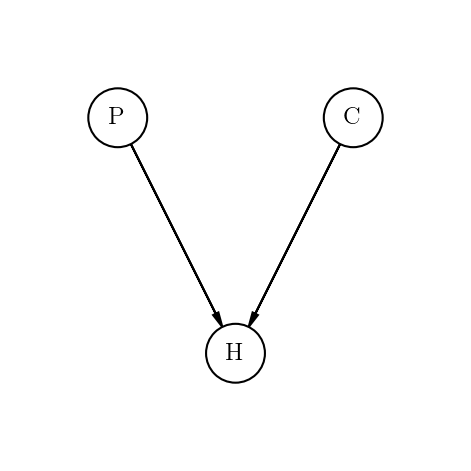

In [ ]:
from IPython.display import Image

Image("examples_Monty_Hall_Problem_3_0.png")

1. Define the network structure(the image above)

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("C", "H"), ("P", "H")])

2. Defining the Conditional Probability Distrubutions(CPDs) for each variable

In [ ]:


# Defining the CPDs:
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)


Could not connect to 127.0.0.1: 59836
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2024.2.3\plugins\python-ce\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 462, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2024.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 81, in attach_to_debugger
    debugger.connect(pydev_localhost.get_localhost(), debugger_port)
  File "C:\Program Files\JetBrains\PyCharm 2024.2.3\plugins\python-ce\helpers\pydev\pydevd.py", line 704, in connect
    s = start_client(host, port)
        ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\JetBrains\PyCharm 2024.2.3\plugins\python-ce\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 462, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 1

3. Adding the CPDs to the model and checking the model

In [ ]:
model.add_cpds(cpd_c, cpd_p, cpd_h)

model.check_model()

True

4. Querying the probability distribution of P, knowing that C is in state 0 and H is in state 2.

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


Probabilitatea ca masina sa fie in spatele usii 1 este 0.66, deci jucatorul ar trebui sa isi schimbe decizia initiala.

Un medic doreşte să determine probabilitatea ca un pacient să aibă o anumită boală pulmonară (B), având în vedere
simptomele observate. Există trei variabile observabile care pot indica prezenţa bolii: tuse (T), dificultate de respiraţie
(D), radiografie anormală (X). Toate acestea sunt variabile binare.

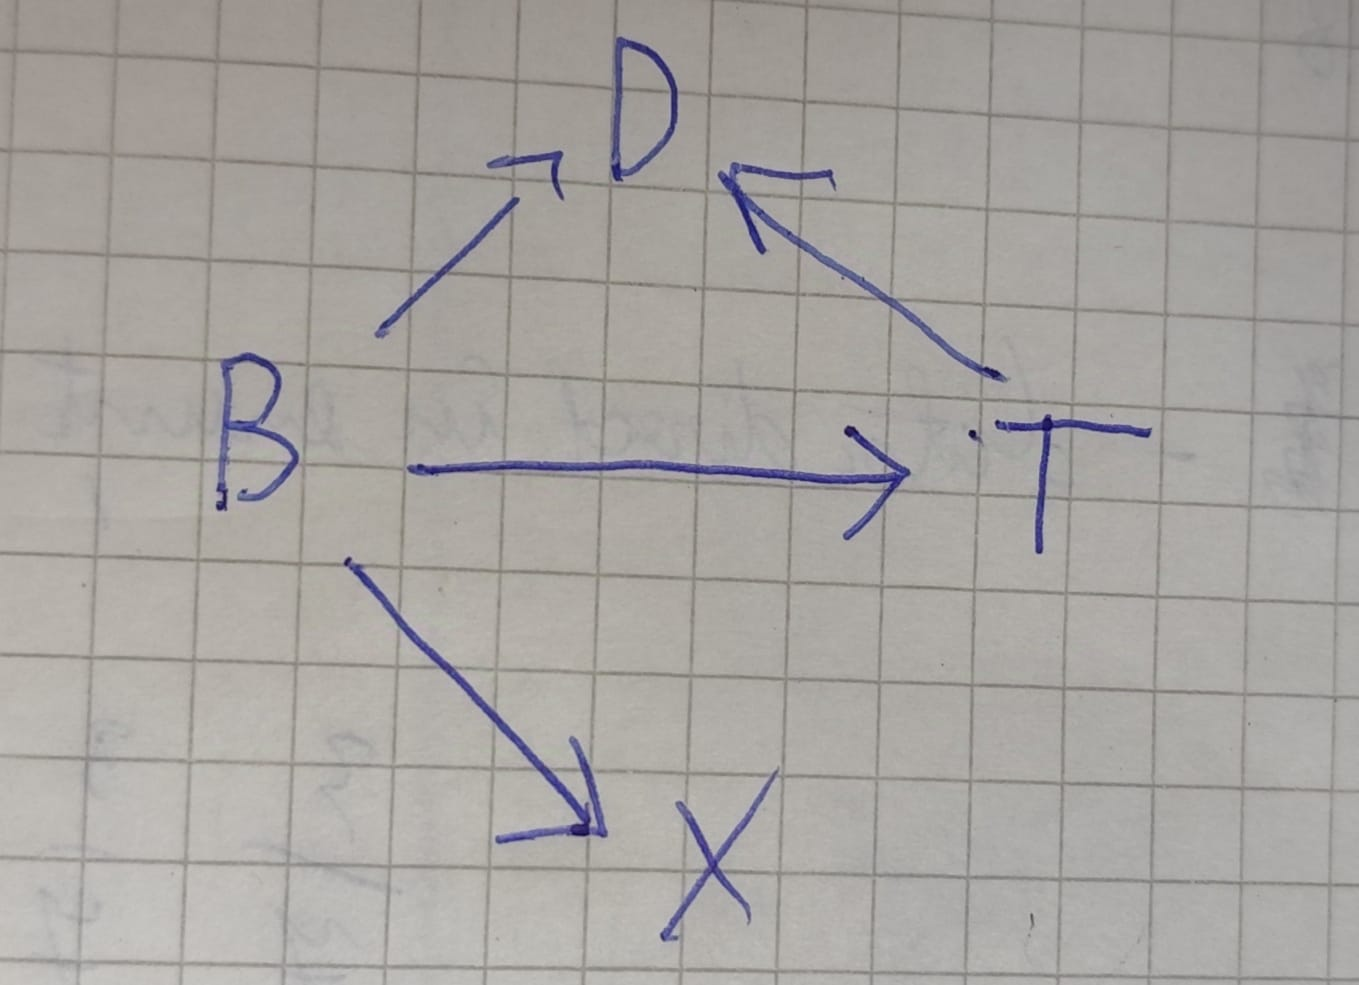

1)

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('B', 'T'), ('B', 'X'), ('B', 'D'), ('T', 'D')])
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.9], [0.1]])

cpd_T = TabularCPD(variable='T', variable_card=2,
                   values=[[0.7, 0.2],
                           [0.3, 0.8]],
                   evidence=['B'],
                   evidence_card=[2])

cpd_X = TabularCPD(variable='X', variable_card=2,
                   values=[[0.9, 0.1],
                           [0.1, 0.9]],
                   evidence=['B'],
                   evidence_card=[2])

cpd_D = TabularCPD(variable='D', variable_card=2,
                   values=[[0.9, 0.5, 0.6, 0.1],
                           [0.1, 0.5, 0.4, 0.9]],
                   evidence=['B', 'T'],
                   evidence_card=[2, 2])

model.add_cpds(cpd_B, cpd_T, cpd_X, cpd_D)
print(model.check_model())

2. Medicul observă că pacientul are tuse şi dificultăţi de respiraţie. Determinaţi probabilitatea ca pacientul să aibă
boala pulmonară.

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_b = infer.query(["B"], evidence={"T": 1, "D": 1})
print(posterior_b)

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6522 |
+------+----------+
| B(1) |   0.3478 |
+------+----------+


Probabilitatea ca pacientul sa aiba boala pulmonara este 0.3478 (35% sanse sa fie bolnav)

3. Ulterior se descoperă (cu alte mijloace) că pacientul nu avea boala pulmonară. Care este probabilitatea ca radiografia să fi fost anormală?

In [ ]:
posterior_x = infer.query(["X"], evidence={"B": 0})
print(posterior_x)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9000 |
+------+----------+
| X(1) |   0.1000 |
+------+----------+


Probabilitatea ca radiografia sa fi fost anormala este 0.1.

4)

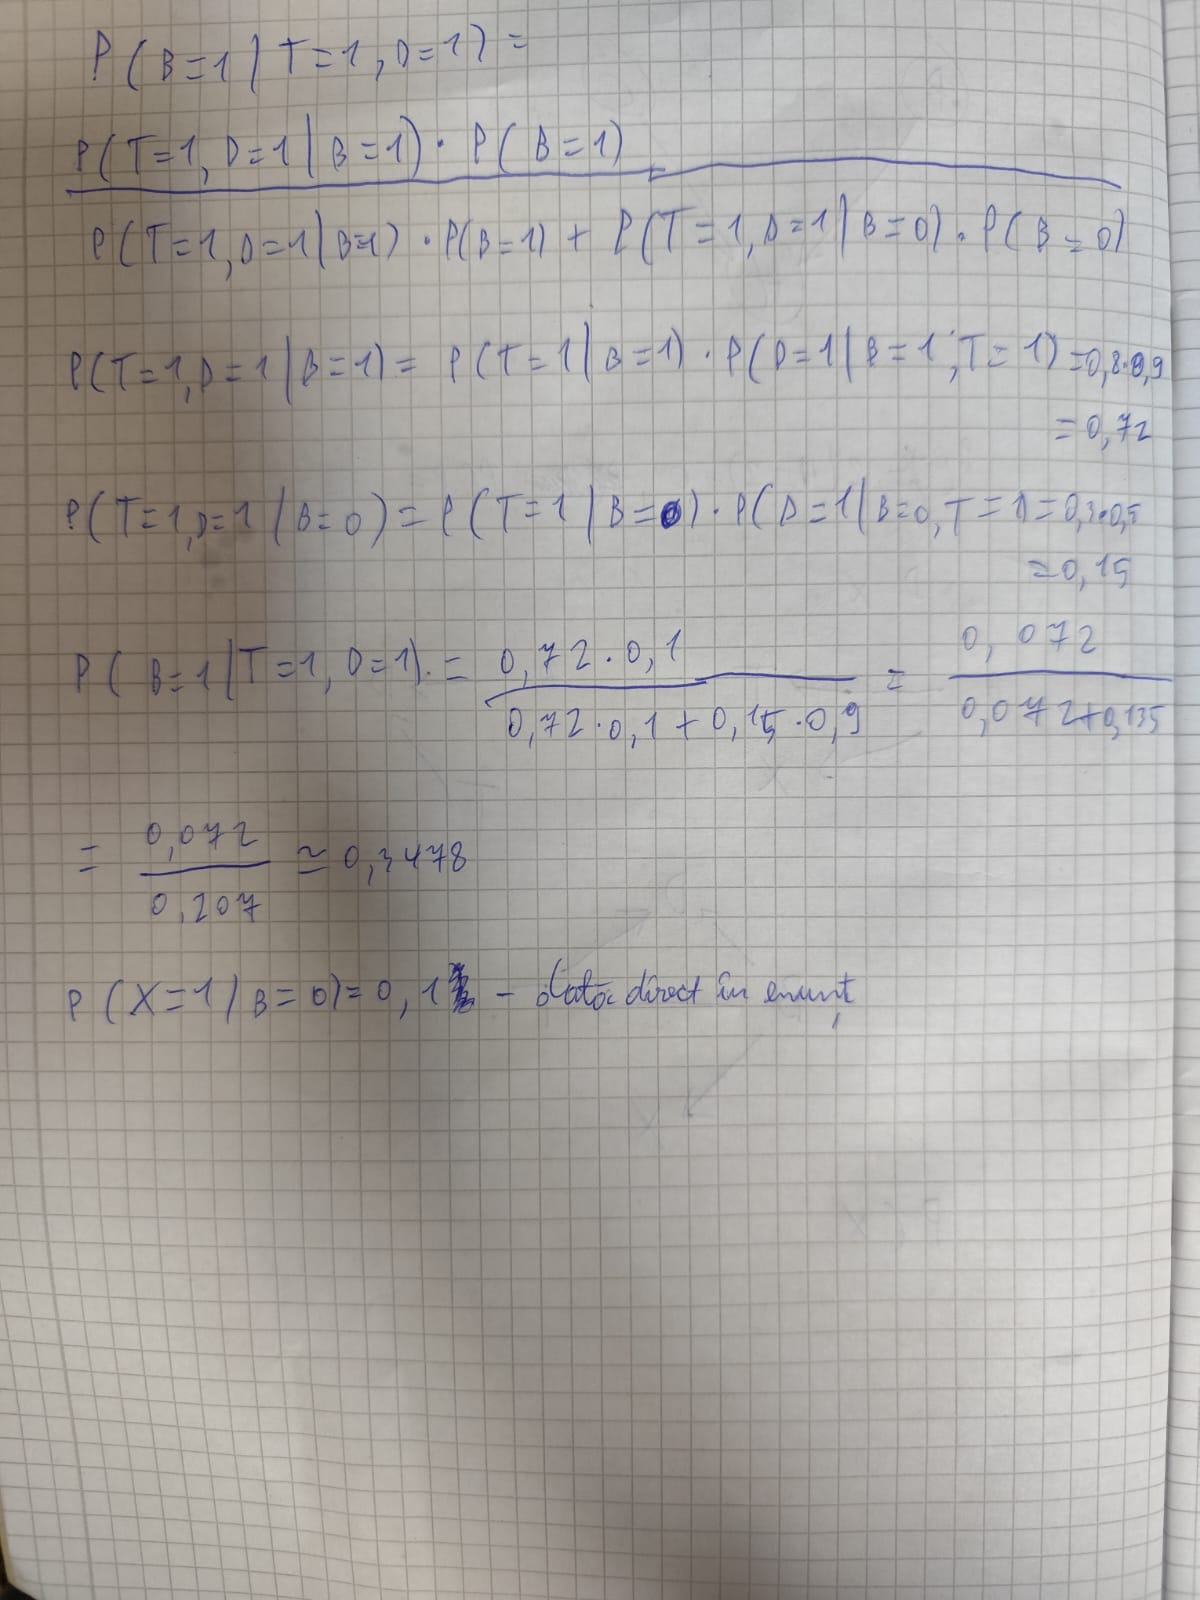

In [ ]:
from IPython.display import Image
Image(filename="Ex2Bonus.jpg")

Ex. 3

1)

In [20]:
import random

def play_game():
    starter = "j0" if random.choice([0, 1]) == 1 else "j1"

    n = random.randint(1, 6)

    m = 0
    if starter == "j1":
        for _ in range(0, 2*n):
            m += random.choice([0, 1])
    else:
        for _ in range(0, 2*n):
            m += 1 if random.random() <= 1/2 else 0

    if n >= m:
        winner = "j0" if starter == "j0" else "j1"
    else:
        winner = "j1" if starter == "j0" else "j0"

    return winner

simulations = []

for _ in range(10000):
    simulations.append(play_game())

print(simulations.count("j1") / len(simulations))

0.496


Jucatorul j1 are sanse mai mari de castig. Intuitiv, el are sanse mai mari de castig deoarece foloseste moneda masluita pentru a juca

2.

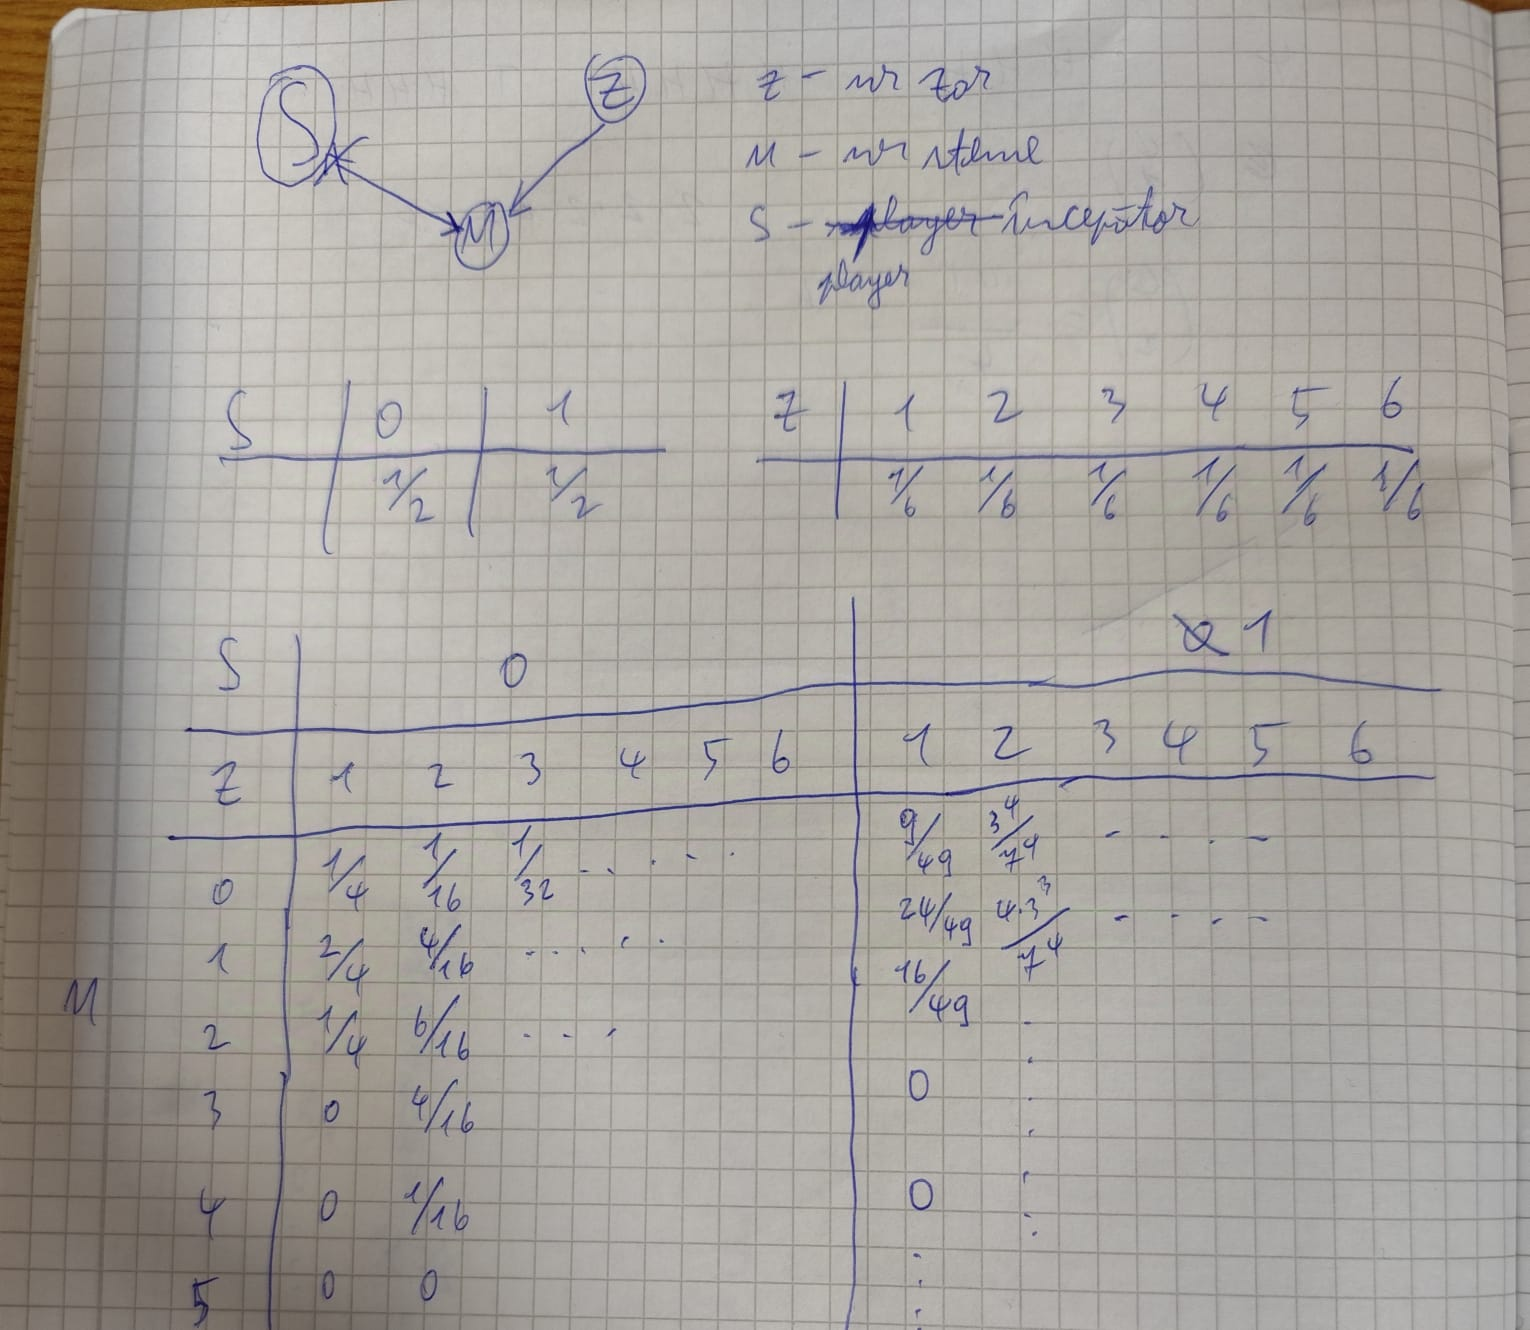

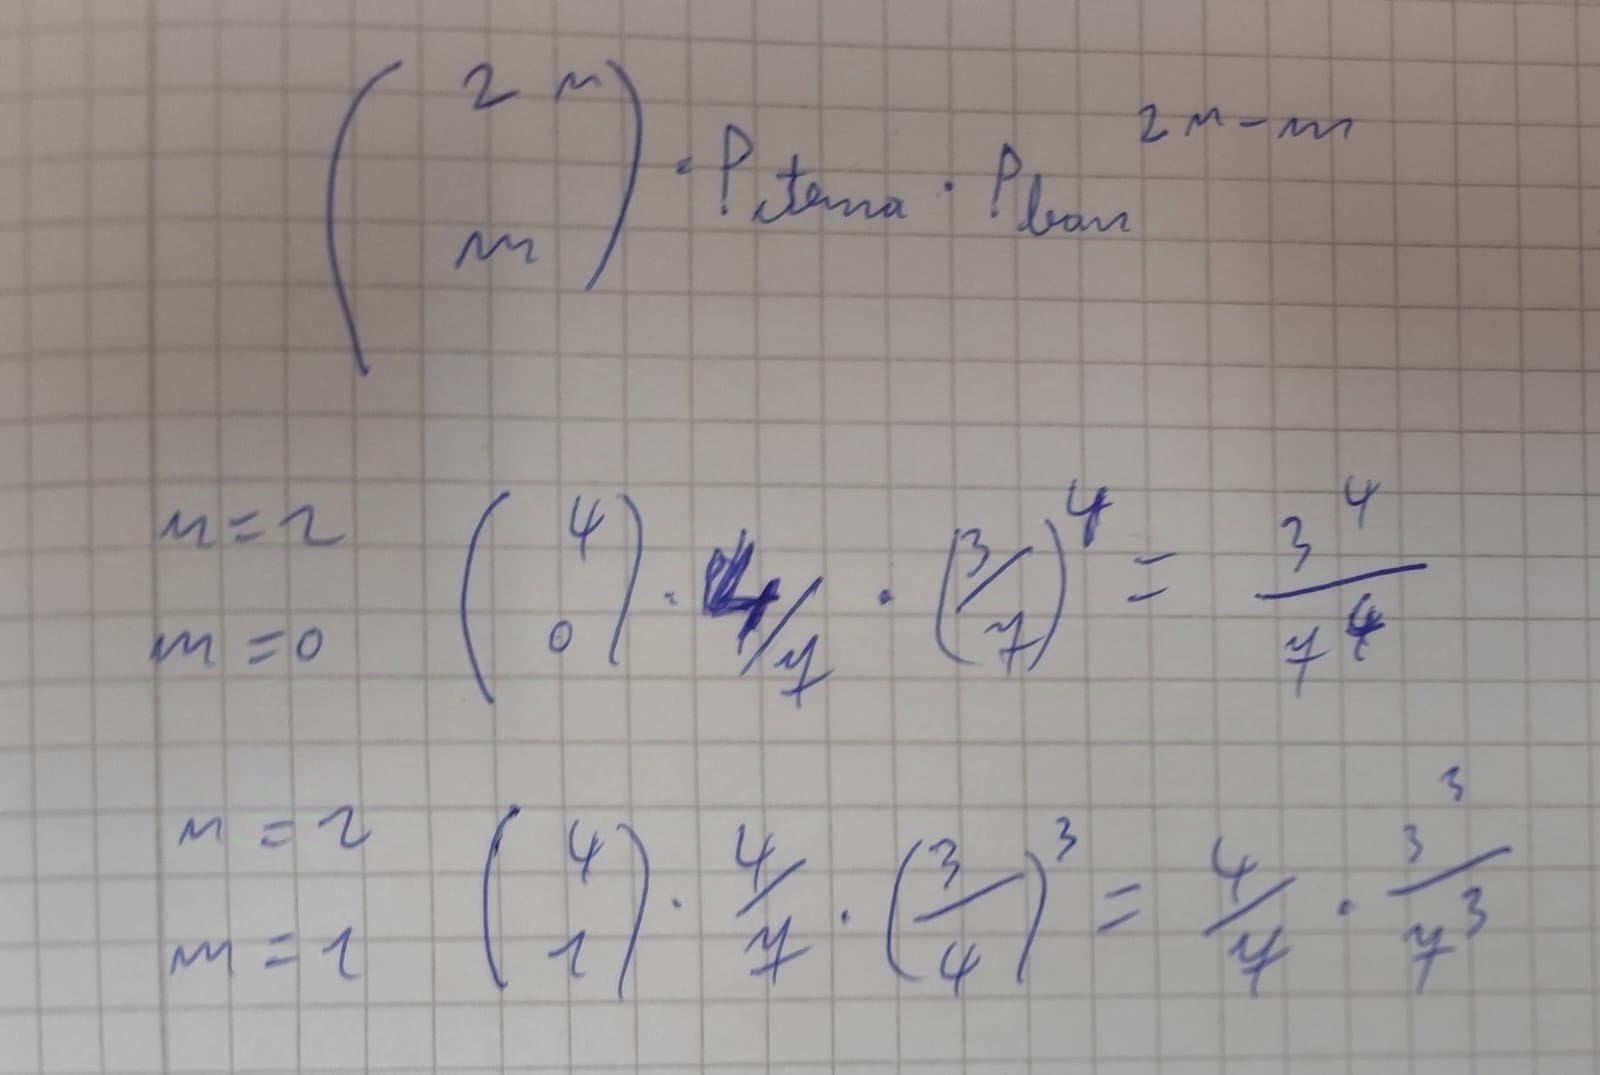

In [30]:

import numpy as np
import math
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('StartingPlayer', 'NrSteme'),
                         ('DieRoll', 'NrSteme')])

cpd_starting_player = TabularCPD(variable='StartingPlayer', variable_card=2,
                                 values=[[0.5], [0.5]])

cpd_die_roll = TabularCPD(variable='DieRoll', variable_card=6,
                          values=[[1/6], [1/6], [1/6], [1/6], [1/6], [1/6]])

max_flips = 12  # Maximum number of flips (2 * max die roll)
coin_flips_values = np.zeros((max_flips + 1, 12))

for starting_player in [0, 1]:  # 0 for J0, 1 for J1
    for die_roll in range(6):
        n = die_roll + 1
        if starting_player == 0:  # J0's fair coin
            probs = [math.comb(2*n, k) * (4/7)**k * (3/7)**(2*n-k) for k in range(2*n + 1)]
        else:  # J1's biased coin
            probs = [math.comb(2*n, k) * (1/2)**k * (1/2)**(2*n-k) for k in range(2*n + 1)]
        probs += [0] * (max_flips + 1 - len(probs))  # Pad with zeros
        coin_flips_values[:, starting_player * 6 + die_roll] = probs

cpd_coin_flips = TabularCPD(variable='NrSteme', variable_card=max_flips + 1,
                            values=coin_flips_values,
                            evidence=['StartingPlayer', 'DieRoll'],
                            evidence_card=[2, 6])

model.add_cpds(cpd_starting_player, cpd_die_roll, cpd_coin_flips)

# Check if the model is valid
print(model.check_model())

True


3. Folosind modelul de mai sus, determinaţi cine e cel mai probabil să fi început jocul, ştiind că în a doua rundă s-a
obţinut o singură stemă.

In [31]:
import numpy as np
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

posterior_s = inference.query(variables=['StartingPlayer'], evidence={"NrSteme": 1})

print(posterior_s)

+-------------------+-----------------------+
| StartingPlayer    |   phi(StartingPlayer) |
+===================+=======================+
| StartingPlayer(0) |                0.4529 |
+-------------------+-----------------------+
| StartingPlayer(1) |                0.5471 |
+-------------------+-----------------------+


Folosind modelul de mai sus aflam ca cel mai probabil jucatorul j0 a inceput jocul. Intuitiv, asta este deoarece 1 stema e un numar mic de steme, care ar trebui sa fie sub numarul mediu de steme in un joc, iar deoarece jucatorul j0 are cea mai mica probabilitate de a obtine o stema, este mai probabil ca el sa fi inceput jocul